# RDS Homework 3 Template
## Spring 2021


In [130]:
!pip install shap

In [131]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.metrics
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Problem 3

### Part (A)

In [132]:
# Mark the categories of interest
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch the data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Set outcome class names
class_names = ['atheism', 'christian']

In [133]:
# Initialize & fit tf-idf vectorizer
vectorizer = TfidfVectorizer(min_df=1)
X_train = vectorizer.fit_transform(newsgroups_train['data'])
X_test = vectorizer.transform(newsgroups_test['data'])

In [134]:
target_train=newsgroups_train['target']
target_test=newsgroups_test['target']

In [135]:
# Train & fit the classifier 
model = sklearn.linear_model.SGDClassifier(loss='log')
model.fit(X_train, target_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [136]:
# Evaluate our classifier's performance
sklearn.metrics.accuracy_score(model.predict(X_test),target_test )

0.9344490934449093

### Part (B)

In [137]:
# Confusion Matrix
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(target_test,model.predict(X_test)).ravel()
print("Correct Christian: ", tp)
print("Correct Atheist: ", tn)
print("Incorrect Christian: ", fn)
print("Incorrect Atheist: ", fp)

Correct Christian:  394
Correct Atheist:  276
Incorrect Christian:  4
Incorrect Atheist:  43


In [138]:
#accuracy using confusion matrix (TP+TN/ALL)
(tn+tp)/(tn+fp+fn+tp)

0.9344490934449093

#### Explainer

In [139]:
# Initialize the explainer and apply to test data
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
# Apply it to the test data
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


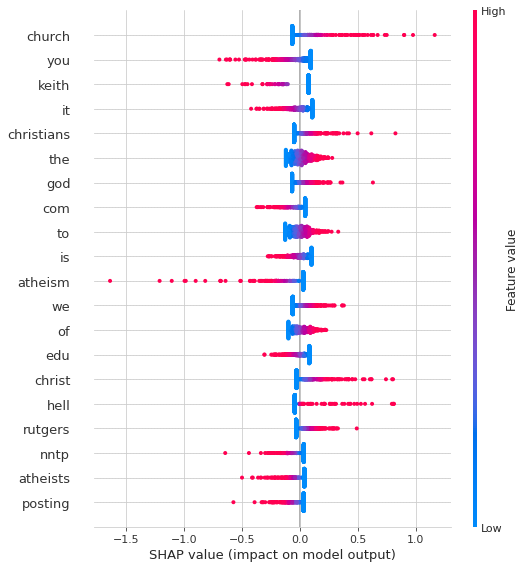

In [140]:
X_test_array = X_test.toarray() # We need to provide the data in dense format, not sparse
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

In [141]:
# Select 5 documents in the test set for explanation
shap.initjs()
idx = 47
print("Actual class: ", "Christian" if target_test[idx] else "Atheist")
print("Predicted class: ", "Christian" if model.predict(X_test)[idx]==1 else "Atheist")
print(newsgroups_test['data'][idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)
#correctly classified

Actual class:  Christian
Predicted class:  Christian
From: mdw33310@uxa.cso.uiuc.edu (Michael D. Walker)
Subject: New thought on Deuterocanonicals
Organization: University of Illinois at Urbana
Lines: 40


	Often times (most recently on this list in the last few days) I've
heard the passage from revelation:

	"...whoever adds to the sacred words of this book...whoever removes
	 words from this book..."    

	 used as an arguement against the deutercanonical books.

	 I feel this is ridiculous for two reasons:

	 1.  They weren't added later by the Catholic Church; they were
		*always* part of what was considered inspired scripture.
		(This has been dealt with in previous postings...no reason
		to repeat the info.)

	2.  It is more likely than not that when St. John (or whomever) wrote
		the book of Revelation WHAT WAS THEN CONSIDERED SCRIPTURE was
		** NOT ** the same thing you and I are holding in our hands!

	If one takes the translation of "this book" in REV 18:22 (or somewhere
	aro

In [142]:
shap.initjs()
idx = 100
print("Actual class: ", "Christian" if target_test[idx] else "Atheist")
print("Predicted class: ", "Christian" if model.predict(X_test)[idx]==1 else "Atheist")
print(newsgroups_test['data'][idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)
#correctly classified

Actual class:  Christian
Predicted class:  Christian
From: Eugene.Bigelow@ebay.sun.com (Geno )
Subject: Re: God, morality, and massacres
Reply-To: Eugene.Bigelow@ebay.sun.com
Organization: Sun Microsystems, Inc.
Lines: 44


 JEK@cu.nih.gov ()  James Kiefer  writes:

  (stuff deleted)

    [First point. What they are doing is wrong, just as what
Joseph's brothers did was wrong, just as what Judas did was wrong.
They intend it for evil. If God somehow brings good out of it, that
does not make them any less subject to just condemnation and
punishment.
     Second point. Of course, God will bring good out of it. But not
the same good that He would have brought if the Serbians had
refrained from the sins of robbery and rape and murder. Nor does the
good He purposes excuse us from the duty of doing what is right.]


So what you're saying then, is that God exercises direct control, or
influence upon humanity. He doesn't control our every thought or action,
but takes what we do, whether it be 

In [143]:
shap.initjs()
idx = 26
print("Actual class: ", "Christian" if target_test[idx] else "Atheist")
print("Predicted class: ", "Christian" if model.predict(X_test)[idx]==1 else "Atheist")
print(newsgroups_test['data'][idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)
#correctly classified

Actual class:  Atheist
Predicted class:  Atheist
From: acooper@mac.cc.macalstr.edu (Turin Turambar, ME Department of Utter Misery)
Subject: STRONG & weak Atheism
Organization: Macalester College
Lines: 14

Did that FAQ ever got modified to re-define strong atheists as not those who
assert the nonexistence of God, but as those who assert that they BELIEVE in 
the nonexistence of God?  There was a thread on this earlier, but I didn't get
the outcome...

-- Adam "No Nickname" Cooper



********************************************************************************
* Adam John Cooper		"Verily, often have I laughed at the weaklings *
* (612) 696-7521		   who thought themselves good simply because  *
* acooper@macalstr.edu				they had no claws."	       *
********************************************************************************



In [144]:
shap.initjs()
idx = 34
print("Actual class: ", "Christian" if target_test[idx] else "Atheist")
print("Predicted class: ", "Christian" if model.predict(X_test)[idx]==1 else "Atheist")
print(newsgroups_test['data'][idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)
#correctly classified

Actual class:  Christian
Predicted class:  Christian
From: ptrei@bistromath.mitre.org (Peter Trei)
Subject: Re: Athiests and Hell
Organization: The MITRE Corporation
Lines: 24

In article <May.9.05.38.49.1993.27375@athos.rutgers.edu> REXLEX@fnal.fnal.gov writes:
[much deleted] 
>point today might be the Masons.  (Just a note, that they too worshipped 
>Osiris in Egypt...)
[much deleted] 

     It bugs me when I see this kind of nonsense.

     First, there is no reasonable evidence linking Masonry to ancient
Egypt, or even that it existed prior to the late 14th century (and
there's nothing definitive before the 17th).

     Second, worship of Osiris is not, nor has it ever been, a part of
Masonic practice (we are strictly non-denominational).

>tangents, never ending tangents,

     You said it!

>Rex

							Peter Trei
							ptrei@mitre.org
							Editor: Masonic Digest



In [145]:
shap.initjs()
idx = 62
print("Actual class: ", "Christian" if target_test[idx] else "Atheist")
print("Predicted class: ", "Christian" if model.predict(X_test)[idx]==1 else "Atheist")
print(newsgroups_test['data'][idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)
#misclassified

Actual class:  Christian
Predicted class:  Atheist
From: biz@soil.princeton.edu (Dave Bisignano)
Subject: Re: Why do people become atheists?
Reply-To: biz@soil.princeton.edu
Organization: Princeton University
Lines: 10

Ken,
Then what happens when you die?
Why are you here?
What is the purpose of Your life, do you think it's 
just by chance you're in the family you are in and have the
friends you have?
Why do you think your searching?  To fill the void that
exists in your life.  Who do you think can fill that void

--Dave--



In [146]:
shap.initjs()
idx = 377
print("Actual class: ", "Christian" if target_test[idx] else "Atheist")
print("Predicted class: ", "Christian" if model.predict(X_test)[idx]==1 else "Atheist")
print(newsgroups_test['data'][idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)
#misclassified

Actual class:  Atheist
Predicted class:  Christian
From: arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee)
Subject: Re: Christian Morality is
Organization: Johns Hopkins University CS Dept.
Lines: 24

In article <4949@eastman.UUCP> dps@nasa.kodak.com writes:
>|>  Yet I am still not a believer.  Is god not concerned with my
>|>  disposition?  Why is it beneath him to provide me with the
>|>  evidence I would require to believe?  The evidence that my
>|>  personality, given to me by this god, would find compelling?
>The fact is God could cause you to believe anything He wants you to. 
>But think about it for a minute.  Would you rather have someone love
>you because you made them love you, or because they wanted to
>love you.

Oh no, not again.

There is a difference between believing that God exists, and loving him.
(For instance, Satan certainly believes God exists, but does not love him.)
What unbelievers request in situations like this is that God provide evidence
compelling enough to be

### Part (C)


#### Part (i)

In [147]:
# Compute the accuracy of the classifier and the number of misclassified documents
# Evaluate our classifier's performance
sklearn.metrics.accuracy_score(target_test, model.predict(X_test))

0.9344490934449093

In [148]:
misclassified = np.where((target_test) != (model.predict(X_test)))

In [149]:
misclassified

(array([ 20,  38,  54,  62,  94,  99, 107, 109, 123, 126, 134, 156, 197,
        216, 217, 245, 271, 335, 366, 377, 399, 406, 413, 419, 438, 447,
        461, 469, 473, 558, 568, 591, 605, 607, 610, 615, 620, 623, 641,
        658, 668, 677, 679, 683, 685, 694, 703]),)

In [150]:
print("Number of misclassified document: ",len(misclassified[0]))

Number of misclassified document:  47


#### Part (ii)

In [151]:
# Calculate conf_i for all misclassified documents 
proba_list=model.predict_proba(X_test)
proba_list

array([[0.45445017, 0.54554983],
       [0.40130696, 0.59869304],
       [0.94441064, 0.05558936],
       ...,
       [0.59924777, 0.40075223],
       [0.05818213, 0.94181787],
       [0.03869513, 0.96130487]])

In [152]:
conf_list=[]
for i in range (len(proba_list)):
  if ((i in misclassified[0])==True):
    conf_i=abs(proba_list[i][0]-proba_list[i][1])
    conf_list.append(conf_i)
#make sure the number of difference matches the misclassified number
print("Number of misclassified documents: ", len(misclassified[0]))
print("Number of difference value: ", len(conf_list))

Number of misclassified documents:  47
Number of difference value:  47


Text(0, 0.5, 'frequency')

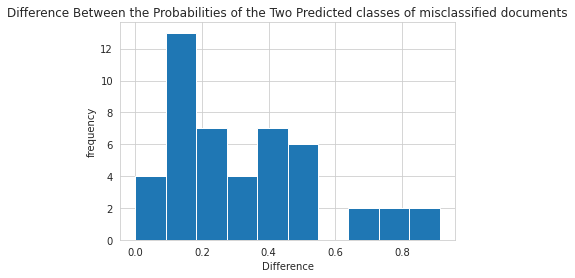

In [153]:
# Plot conf_i
plt.hist(conf_list)
plt.title("Difference Between the Probabilities of the Two Predicted classes of misclassified documents")
plt.xlabel("Difference")
plt.ylabel("frequency")

#### Part (iii)

In [154]:
#misclassified(original:christian predict:atheist)
misclassified_christian=[]
#misclassified(original:atheist predict:christian)
misclassified_atheist=[]
predict_list=model.predict(X_test)
for i in range (len(target_test)):
  if target_test[i]==1:
    if predict_list[i]==0:
      misclassified_christian.append(i)
  else:
    if predict_list[i]==1:
      misclassified_atheist.append(i)

#misclassified_christian = np.where((target_test==1) and (model.predict(X_test)==0))

In [155]:
#true label=Christian predict label=Atheist
misclassified_christian

[54, 62, 217, 685]

In [156]:
#true label=Atheist predict label=christian
misclassified_atheist

[20,
 38,
 94,
 99,
 107,
 109,
 123,
 126,
 134,
 156,
 197,
 216,
 245,
 271,
 335,
 366,
 377,
 399,
 406,
 413,
 419,
 438,
 447,
 461,
 469,
 473,
 558,
 568,
 591,
 605,
 607,
 610,
 615,
 620,
 623,
 641,
 658,
 668,
 677,
 679,
 683,
 694,
 703]

In [157]:
# Identify tokens (word_j) that contributed to the misclassification of documents
# Checking the words that contribute to the Christian classification of misclassified documents(truth is atheist)
missiclassifed_christian_word_list = defaultdict(float)
missiclassifed_atheist_word_list = defaultdict(float)
word_j= defaultdict(float)
count_j= defaultdict(float)

for index in misclassified[0]:
  idx = index
  vals = shap_values[idx,:]
  actual_vals= target_test[idx]
  feats = vectorizer.get_feature_names()

  for feat_i, val_i in zip(feats, vals):
    if val_i > 0 and actual_vals==0 and (feat_i in newsgroups_test.data[idx]):
      missiclassifed_christian_word_list[feat_i] += val_i
      word_j[feat_i]+= np.abs(val_i)
      count_j[feat_i]+=1
    elif val_i < 0 and actual_vals==1 and (feat_i in newsgroups_test.data[idx]):
      missiclassifed_atheist_word_list[feat_i] += val_i
      word_j[feat_i]+= np.abs(val_i)
      count_j[feat_i]+=1



In [158]:
len(count_j)

2164

In [159]:
count_j

defaultdict(float,
            {'abo': 22.0,
             'about': 15.0,
             'al': 41.0,
             'alt': 10.0,
             'an': 29.0,
             'ap': 29.0,
             'astro': 2.0,
             'books': 8.0,
             'can': 20.0,
             'chris': 8.0,
             'city': 4.0,
             'co': 38.0,
             'councils': 1.0,
             'de': 41.0,
             'der': 29.0,
             'do': 22.0,
             'du': 39.0,
             'ed': 41.0,
             'et': 37.0,
             'etc': 8.0,
             'fi': 25.0,
             'find': 7.0,
             'fun': 5.0,
             'hard': 2.0,
             'ho': 39.0,
             'ie': 41.0,
             'in': 24.0,
             'is': 25.0,
             'it': 26.0,
             'let': 12.0,
             'native': 2.0,
             'nc': 35.0,
             'ocis': 2.0,
             'ok': 21.0,
             'on': 27.0,
             'out': 17.0,
             'ra': 40.0,
             'read': 9.0,
   

In [160]:
len(missiclassifed_atheist_word_list)

267

In [161]:
len(missiclassifed_christian_word_list)

2045

In [162]:
len(word_j)

2164

In [163]:
word_j

defaultdict(float,
            {'abo': 0.034500744335977655,
             'about': 0.17492957955831115,
             'al': 0.02066982082713323,
             'alt': 0.03943917361838039,
             'an': 0.8986267424390566,
             'ap': 0.05171217759154601,
             'astro': 0.13709837708692918,
             'books': 0.1621228202761554,
             'can': 0.14066866431903477,
             'chris': 0.01933916985355295,
             'city': 0.10833682344968917,
             'co': 0.30012977897313453,
             'councils': 0.011698679717825792,
             'de': 0.380215645030283,
             'der': 0.0008467878208305407,
             'do': 0.04058690470868714,
             'du': 0.02151755331530361,
             'ed': 0.03506467686908629,
             'et': 0.017052547064363103,
             'etc': 0.029935398727609103,
             'fi': 0.1262308459163444,
             'find': 0.2260033070306154,
             'fun': 0.0006880985888321079,
             'hard': 0.02414888

In [164]:
len(word_j.keys())

2164

In [165]:
# Compute the sum of absolute SHAP values (weight_j) for each word_j
word_j

defaultdict(float,
            {'abo': 0.034500744335977655,
             'about': 0.17492957955831115,
             'al': 0.02066982082713323,
             'alt': 0.03943917361838039,
             'an': 0.8986267424390566,
             'ap': 0.05171217759154601,
             'astro': 0.13709837708692918,
             'books': 0.1621228202761554,
             'can': 0.14066866431903477,
             'chris': 0.01933916985355295,
             'city': 0.10833682344968917,
             'co': 0.30012977897313453,
             'councils': 0.011698679717825792,
             'de': 0.380215645030283,
             'der': 0.0008467878208305407,
             'do': 0.04058690470868714,
             'du': 0.02151755331530361,
             'ed': 0.03506467686908629,
             'et': 0.017052547064363103,
             'etc': 0.029935398727609103,
             'fi': 0.1262308459163444,
             'find': 0.2260033070306154,
             'fun': 0.0006880985888321079,
             'hard': 0.02414888

Text(0, 0.5, 'frequency')

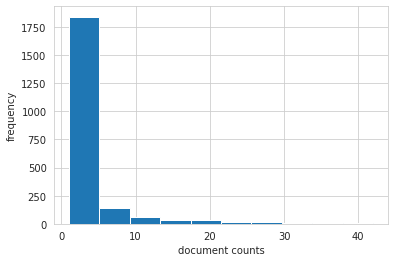

In [166]:
# Plot the distribution of count_j and weight_j
plt.hist(list(count_j.values()))
plt.xlabel("document counts")
plt.ylabel("frequency")

Text(0.5, 0, 'weight')

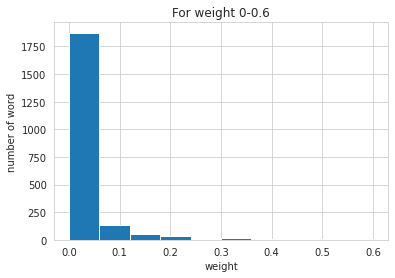

In [167]:
bins = np.linspace(0, 2)
plt.hist(list(word_j.values()),range=(0,0.6))
plt.title("For weight 0-0.6")
plt.ylabel("number of word")
plt.xlabel("weight")

Text(0.5, 0, 'weight')

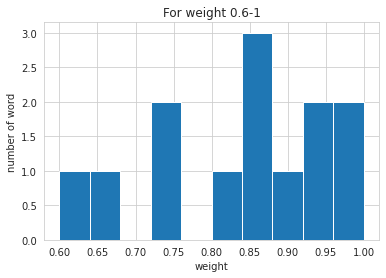

In [168]:
bins = np.linspace(0, 2)
plt.hist(list(word_j.values()),range= (0.6,1))
plt.title("For weight 0.6-1")
plt.ylabel("number of word")
plt.xlabel("weight")

Text(0.5, 0, 'weight')

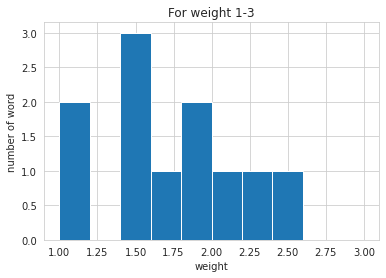

In [169]:
bins = np.linspace(0, 2)
plt.hist(list(word_j.values()),range= (1,3))
plt.title("For weight 1-3")
plt.ylabel("number of word")
plt.xlabel("weight")

Text(0, 0.5, 'weight')

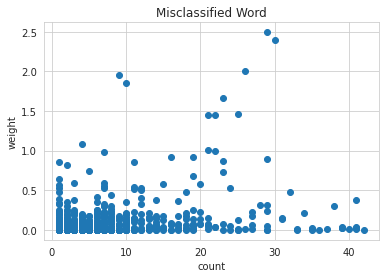

In [170]:
plt.scatter(list(count_j.values()),list(word_j.values()))
plt.title("Misclassified Word")
plt.xlabel("count")
plt.ylabel("weight")

In [171]:
np.corrcoef(list(count_j.values()),list(word_j.values()))

array([[1.        , 0.38067034],
       [0.38067034, 1.        ]])

## Problem 4 (extra credit)

In [172]:
!pip install shap

In [173]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.metrics
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [174]:
# Reload the data
# Mark the categories of interest
categories = ['alt.atheism', 'soc.religion.christian']

# Fetch the data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Set outcome class names
class_names = ['atheism', 'christian']

In [175]:
# Implement a strategy for feature selection
#sorted the dictornary by count
from collections import OrderedDict
sorted_count_j=(OrderedDict(sorted(count_j.items(), key=lambda t: t[1],reverse=True)))
sorted_weight_j= (OrderedDict(sorted(word_j.items(), key=lambda t: t[1],reverse=True)))

In [176]:
# the droping word should have high count and high weigh in misclassified document
# According to the scatter plot in question C, I defined count larger than 30 as large count
list1=[]
for i in (list(count_j.values())):
  if i > 30:
    list1.append(i)
print("Number of misclassified word(count >= 30): ", len(list1))

Number of misclassified word(count >= 30):  21


In [177]:
# find the word that has large weight, according to the scatter plot, I defined the
# weight larger than 0.35 as large weight
list2=[]
for i in (list(word_j.values())):
  if i > 0.75:
    list2.append(i)
print("Number of misclassified word(weight >= 0.75): ", len(list2))

Number of misclassified word(weight >= 0.75):  20


In [178]:
top_count_list = list(sorted_count_j.keys())[:len(list1)]
top_weight_list = list(sorted_weight_j.keys())[:len(list2)]

In [179]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
English = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [180]:
# for those word that shown in count >40 and weight >0.35, they are the
# words that have large count and large weight in the misclassification
# and they are the features that affect the accuracy 
delete_list= top_count_list+top_weight_list + English


In [192]:
#There are 23 words that match the condition
print("The misclassified words that have count >= 30 and weight >=0.75 and english stop words: ", len(delete_list))


The misclassified words that have count >= 30 and weight >=0.75 and english stop words:  220


In [182]:
#List of the remove features
delete_list

['rs',
 'al',
 'de',
 'ed',
 'ie',
 'ra',
 'du',
 'ho',
 'za',
 'co',
 'et',
 'wi',
 'nc',
 've',
 'pr',
 'po',
 'eve',
 'ny',
 'au',
 'tu',
 'men',
 'the',
 'of',
 'it',
 'church',
 'faith',
 'to',
 'is',
 'you',
 'and',
 'temple',
 'edu',
 'com',
 'love',
 'we',
 'me',
 'an',
 'as',
 'our',
 'mangoe',
 'hell',
 'i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',

In [183]:
target_train=newsgroups_train['target']
target_test=newsgroups_test['target']

In [184]:
# Initialize & fit tf-idf vectorizer
vectorizer = TfidfVectorizer(stop_words=delete_list)
X_train_new = vectorizer.fit_transform(newsgroups_train.data)
X_test_new = vectorizer.transform(newsgroups_test.data)

# Train & fit the classifier 
model = sklearn.linear_model.SGDClassifier(loss='log')
model.fit(X_train_new, target_train)
y_pred_new=model.predict(X_test_new)


In [185]:
# Initialize the explainer and apply to test data
explainer = shap.LinearExplainer(model, X_train_new, feature_perturbation="interventional")
# Apply it to the test data
shap_values = explainer.shap_values(X_test_new)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [186]:
# Evaluate our classifier's performance
sklearn.metrics.accuracy_score(target_test,y_pred_new)

0.9372384937238494

In [187]:
sklearn.metrics.confusion_matrix(target_test,y_pred_new)

array([[277,  42],
       [  3, 395]])

In [188]:
#Compared to the original model
misclassified_new = np.where((target_test) != y_pred_new)
print("Number of the misclassified file before feature selection: ", len(misclassified[0]))
print("Number of the misclassified file after feature selection: ", len(misclassified_new[0]))

print('Missiclassified files before feature selection: ', misclassified[0])
print('Missiclassified files after feature selection: ', misclassified_new[0])

Number of the misclassified file before feature selection:  47
Number of the misclassified file after feature selection:  45
Missiclassified files before feature selection:  [ 20  38  54  62  94  99 107 109 123 126 134 156 197 216 217 245 271 335
 366 377 399 406 413 419 438 447 461 469 473 558 568 591 605 607 610 615
 620 623 641 658 668 677 679 683 685 694 703]
Missiclassified files after feature selection:  [ 25  38  54  94  99 107 109 123 126 134 156 164 197 216 217 245 271 313
 366 399 406 413 419 442 447 461 469 558 568 591 593 606 607 610 615 620
 623 630 641 668 677 683 685 694 703]


In [189]:
X_test_new_array = X_test_new.toarray() # We need to provide the data in dense format, not sparse

In [190]:
# Identify at least one example that was misclassified before feature selection and that is classified correctly after feature selection
shap.initjs()
idx = 62
print("Actual class: ", "Christian" if target_test[idx] else "Atheist")
print("Predicted class: ", "Christian" if y_pred_new[idx] else "Atheist")
print(newsgroups_test.data[idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_new_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)
#correctly classified

Actual class:  Christian
Predicted class:  Christian
From: biz@soil.princeton.edu (Dave Bisignano)
Subject: Re: Why do people become atheists?
Reply-To: biz@soil.princeton.edu
Organization: Princeton University
Lines: 10

Ken,
Then what happens when you die?
Why are you here?
What is the purpose of Your life, do you think it's 
just by chance you're in the family you are in and have the
friends you have?
Why do you think your searching?  To fill the void that
exists in your life.  Who do you think can fill that void

--Dave--



In [191]:
# Identify at least one example that was misclassified before feature selection and that is classified correctly after feature selection
shap.initjs()
idx = 377
print("Actual class: ", "Christian" if target_test[idx] else "Atheist")
print("Predicted class: ", "Christian" if y_pred_new[idx] else "Atheist")
print(newsgroups_test.data[idx])
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_new_array[idx,:],
    feature_names=vectorizer.get_feature_names()
)
#correctly classified

Actual class:  Atheist
Predicted class:  Atheist
From: arromdee@jyusenkyou.cs.jhu.edu (Ken Arromdee)
Subject: Re: Christian Morality is
Organization: Johns Hopkins University CS Dept.
Lines: 24

In article <4949@eastman.UUCP> dps@nasa.kodak.com writes:
>|>  Yet I am still not a believer.  Is god not concerned with my
>|>  disposition?  Why is it beneath him to provide me with the
>|>  evidence I would require to believe?  The evidence that my
>|>  personality, given to me by this god, would find compelling?
>The fact is God could cause you to believe anything He wants you to. 
>But think about it for a minute.  Would you rather have someone love
>you because you made them love you, or because they wanted to
>love you.

Oh no, not again.

There is a difference between believing that God exists, and loving him.
(For instance, Satan certainly believes God exists, but does not love him.)
What unbelievers request in situations like this is that God provide evidence
compelling enough to beli